In [1]:
from metric_utils import *
import numpy as np
import matplotlib.pyplot as plt
from model import DNATransformerEncoder
import torch
import yaml

%load_ext autoreload
%autoreload 2

In [ ]:
with open('config.yaml', 'r') as stream:
    try:
        cfg = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

model = DNATransformerEncoder(cfg)
model.load_state_dict(torch.load('model_checkpoint.pt'))

In [20]:
np.unique(np.concatenate(y_true_list))

array([0, 1])

In [9]:
y_true_list, y_pred_list = load_test_predictions()
y_true_flat = np.concatenate(y_true_list)
y_pred_flat = np.concatenate(y_pred_list)


In [10]:
y_pred_flat.shape

(24146,)

In [7]:
accuracy, precision, recall, fscore, c_matrix = evaluate_classification(y_true_flat, y_pred_flat)

Accuracy: 0.6648
Precision: 0.7104
Recall: 0.7481
F1-Score: 0.7288


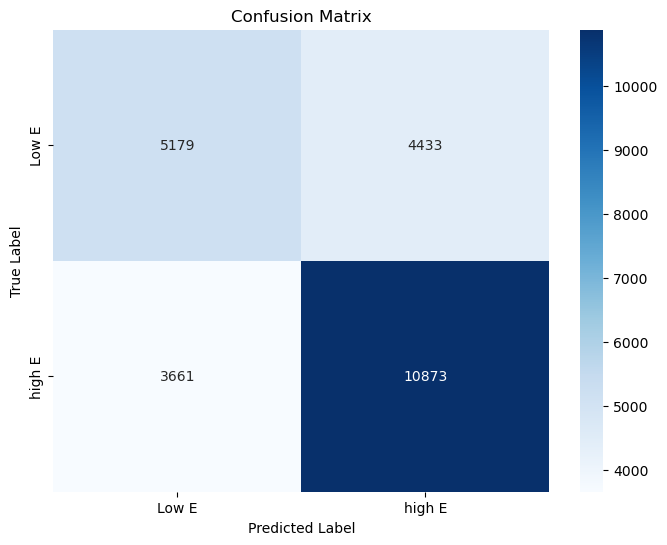

In [8]:
plot_classification_metrics(y_true_flat, y_pred_flat, class_names=['Low E', 'high E'])

In [11]:
mse, rmse, mae, r2, mape, explained_variance = evaluate_regression_model(y_true_flat, y_pred_flat)

Mean Squared Error (MSE): 0.07142373919487
Root Mean Squared Error (RMSE): 0.26725220680236816
Mean Absolute Error (MAE): 0.22811612486839294
R-squared (Coefficient of Determination): 0.15344914919499109
Mean Absolute Percentage Error (MAPE): 3.3752317428588867
Explained Variance Score: 0.15654367208480835


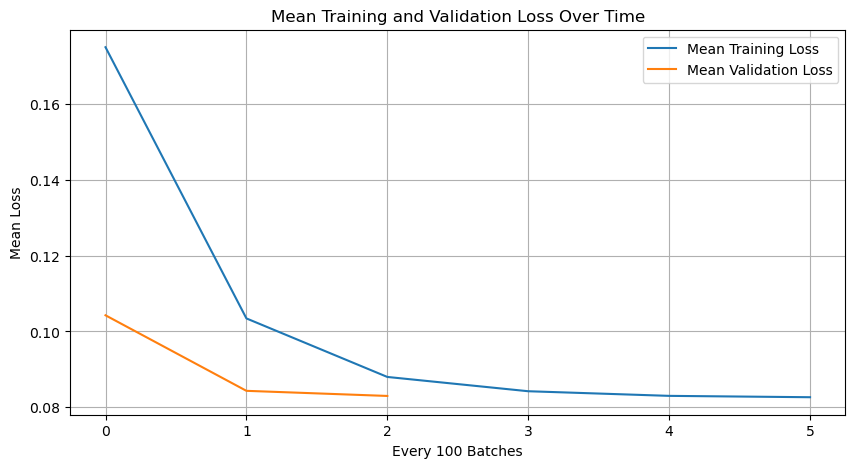

In [4]:
plot_mean_loss('loss_data.json', 100)